In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msg
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
df1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

# Ques 1  - Winner ? 

In [9]:
main_df = df1[((df1['team1'] == 'Rajasthan Royals') & (df1['team2'] == 'Chennai Super Kings')) | ((df1['team1'] == 'Chennai Super Kings') & (df1['team2'] == 'Rajasthan Royals'))]
main_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
82,83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
109,110,2008,Chennai,2008-05-24,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk",DJ Harper,SL Shastri,NaN
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
136,137,2009,Centurion,2009-04-30,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,38,0,SK Raina,SuperSport Park,GAV Baxter,RE Koertzen,NaN
151,152,2009,Kimberley,2009-05-09,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,7,S Badrinath,De Beers Diamond Oval,GAV Baxter,HDPK Dharmasena,NaN
197,198,2010,Ahmedabad,2010-03-28,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,17,0,NV Ojha,"Sardar Patel Stadium, Motera",SS Hazare,SJA Taufel,NaN
205,206,2010,Chennai,2010-04-03,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,23,0,M Vijay,"MA Chidambaram Stadium, Chepauk",RE Koertzen,RB Tiffin,NaN
275,276,2011,Chennai,2011-05-04,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,8,MEK Hussey,"MA Chidambaram Stadium, Chepauk",SS Hazare,RB Tiffin,NaN
284,285,2011,Jaipur,2011-05-09,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,63,0,M Vijay,Sawai Mansingh Stadium,K Hariharan,SJA Taufel,NaN
333,334,2012,Chennai,2012-04-21,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,7,F du Plessis,"MA Chidambaram Stadium, Chepauk",Aleem Dar,BNJ Oxenford,NaN


In [10]:
main_df['winner'].value_counts()

Chennai Super Kings    14
Rajasthan Royals        7
Name: winner, dtype: int64

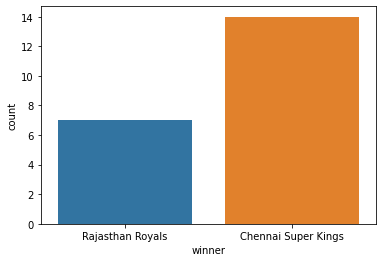

In [11]:
sb.countplot(main_df['winner'])

In [12]:
# Acc to this stats , CSK has more chances of winning than RR

In [13]:
# Since the match is being hosted at 'Sheikh Zyada Staidum' , the average batting is 150+ for first innings !

In [14]:
# I guess, CSK will win the match over RR 

# Ques 1 ans - CSK

In [16]:
##########################################################################################################################

# Ques 2 - runs in 1st 6 over by RR

In [18]:
main_df_rr = df[(((df['batting_team'] == 'Rajasthan Royals')  & ((df['bowling_team'] == 'Chennai Super Kings'))))]
main_df_rr

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
19457,83,2,Rajasthan Royals,Chennai Super Kings,1,1,GC Smith,SA Asnodkar,M Ntini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
19458,83,2,Rajasthan Royals,Chennai Super Kings,1,2,GC Smith,SA Asnodkar,M Ntini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
19459,83,2,Rajasthan Royals,Chennai Super Kings,1,3,GC Smith,SA Asnodkar,M Ntini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
19460,83,2,Rajasthan Royals,Chennai Super Kings,1,4,GC Smith,SA Asnodkar,M Ntini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
19461,83,2,Rajasthan Royals,Chennai Super Kings,1,5,GC Smith,SA Asnodkar,M Ntini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170701,11316,1,Rajasthan Royals,Chennai Super Kings,20,2,S Gopal,J Archer,SN Thakur,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
170702,11316,1,Rajasthan Royals,Chennai Super Kings,20,3,S Gopal,J Archer,SN Thakur,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
170703,11316,1,Rajasthan Royals,Chennai Super Kings,20,4,S Gopal,J Archer,SN Thakur,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170704,11316,1,Rajasthan Royals,Chennai Super Kings,20,5,J Archer,S Gopal,SN Thakur,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [19]:
over = main_df_rr[main_df_rr['over'] <7]

In [20]:
over

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
19457,83,2,Rajasthan Royals,Chennai Super Kings,1,1,GC Smith,SA Asnodkar,M Ntini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
19458,83,2,Rajasthan Royals,Chennai Super Kings,1,2,GC Smith,SA Asnodkar,M Ntini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
19459,83,2,Rajasthan Royals,Chennai Super Kings,1,3,GC Smith,SA Asnodkar,M Ntini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
19460,83,2,Rajasthan Royals,Chennai Super Kings,1,4,GC Smith,SA Asnodkar,M Ntini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
19461,83,2,Rajasthan Royals,Chennai Super Kings,1,5,GC Smith,SA Asnodkar,M Ntini,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170616,11316,1,Rajasthan Royals,Chennai Super Kings,6,2,SV Samson,SPD Smith,M Santner,0,...,0,0,0,0,0,0,0,SV Samson,caught,NaN
170617,11316,1,Rajasthan Royals,Chennai Super Kings,6,3,SPD Smith,RA Tripathi,M Santner,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170618,11316,1,Rajasthan Royals,Chennai Super Kings,6,4,RA Tripathi,SPD Smith,M Santner,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170619,11316,1,Rajasthan Royals,Chennai Super Kings,6,5,RA Tripathi,SPD Smith,M Santner,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [21]:
match = over['match_id'].nunique()

In [22]:
total_runs = over['total_runs'].sum()

In [23]:
total_runs / match

45.57142857142857

In [24]:
## Avg 1st 6 over run by rr against csk is 46

In [25]:
## Lets check wrt to all team

In [26]:
main_df_rr_all = df[(((df['batting_team'] == 'Rajasthan Royals')))]
main_df_rr_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14335,62,1,Rajasthan Royals,Delhi Daredevils,1,1,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14336,62,1,Rajasthan Royals,Delhi Daredevils,1,2,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14337,62,1,Rajasthan Royals,Delhi Daredevils,1,3,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14338,62,1,Rajasthan Royals,Delhi Daredevils,1,4,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
14339,62,1,Rajasthan Royals,Delhi Daredevils,1,5,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177290,11344,1,Rajasthan Royals,Delhi Capitals,20,3,VR Aaron,R Parag,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177291,11344,1,Rajasthan Royals,Delhi Capitals,20,4,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177292,11344,1,Rajasthan Royals,Delhi Capitals,20,5,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177293,11344,1,Rajasthan Royals,Delhi Capitals,20,6,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [28]:
over = main_df_rr_all[main_df_rr_all['over'] <7]
match = over['match_id'].nunique()
total_runs = over['total_runs'].sum()
total_runs / match

45.23972602739726

In [29]:
# 45.23 avg first 6 over by rr

In [30]:
## therefore , the avg runs will be in between (40-49)

# Ques 2 ans  - opt 2(40-49)

In [31]:
#########################################################################################################################

# Ques 3 - Economy of deepak chahar ?

In [35]:
main_df_deepak_all = df[(((df['bowler'] == 'DL Chahar')))]
main_df_deepak_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
255,2,1,Mumbai Indians,Rising Pune Supergiant,2,1,JC Buttler,PA Patel,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
256,2,1,Mumbai Indians,Rising Pune Supergiant,2,2,JC Buttler,PA Patel,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
257,2,1,Mumbai Indians,Rising Pune Supergiant,2,3,JC Buttler,PA Patel,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
258,2,1,Mumbai Indians,Rising Pune Supergiant,2,4,JC Buttler,PA Patel,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
259,2,1,Mumbai Indians,Rising Pune Supergiant,2,5,JC Buttler,PA Patel,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178943,11415,1,Mumbai Indians,Chennai Super Kings,19,2,HH Pandya,KA Pollard,DL Chahar,0,...,0,0,0,0,0,0,0,HH Pandya,lbw,NaN
178944,11415,1,Mumbai Indians,Chennai Super Kings,19,3,RD Chahar,KA Pollard,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178945,11415,1,Mumbai Indians,Chennai Super Kings,19,4,RD Chahar,KA Pollard,DL Chahar,0,...,0,0,0,0,0,0,0,RD Chahar,caught,F du Plessis
178946,11415,1,Mumbai Indians,Chennai Super Kings,19,5,MJ McClenaghan,KA Pollard,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [36]:
match = main_df_deepak_all['match_id'].nunique()

In [37]:
main_df_deepak_all.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [38]:
runs = main_df_deepak_all[['wide_runs','batsman_runs' ,'noball_runs']]
runs

,wide_runs,batsman_runs,noball_runs
255,0,4,0
256,0,0,0
257,0,4,0
258,0,0,0
259,0,0,0
...,...,...,...
178943,0,0,0
178944,0,0,0
178945,0,0,0
178946,0,0,0


In [39]:
runs['wide_runs'].sum()

32

In [40]:
runs['batsman_runs'].sum() , runs['noball_runs'].sum()

(877, 5)

In [41]:
(32+877+5) / match

26.88235294117647

In [43]:
26.88 / 4

6.72

In [44]:
## Deepak chahar has an avg economy of 6.7 wrt to all team !

In [45]:
## lets check wrt to RR

In [46]:
main_df_deepak_rr = df[(((df['bowler'] == 'DL Chahar') & (df['batting_team'] == 'Rajasthan Royals')))]
main_df_deepak_rr

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
154358,7910,2,Rajasthan Royals,Chennai Super Kings,1,1,AM Rahane,H Klaasen,DL Chahar,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
154359,7910,2,Rajasthan Royals,Chennai Super Kings,1,2,AM Rahane,H Klaasen,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
154360,7910,2,Rajasthan Royals,Chennai Super Kings,1,3,H Klaasen,AM Rahane,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
154361,7910,2,Rajasthan Royals,Chennai Super Kings,1,4,H Klaasen,AM Rahane,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
154362,7910,2,Rajasthan Royals,Chennai Super Kings,1,5,AM Rahane,H Klaasen,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170695,11316,1,Rajasthan Royals,Chennai Super Kings,19,2,BA Stokes,J Archer,DL Chahar,0,...,0,0,0,0,0,0,0,BA Stokes,bowled,NaN
170696,11316,1,Rajasthan Royals,Chennai Super Kings,19,3,S Gopal,J Archer,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170697,11316,1,Rajasthan Royals,Chennai Super Kings,19,4,J Archer,S Gopal,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170698,11316,1,Rajasthan Royals,Chennai Super Kings,19,5,S Gopal,J Archer,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [47]:
match = main_df_deepak_rr['match_id'].nunique()
runs = main_df_deepak_rr[['wide_runs','batsman_runs' ,'noball_runs']]
runs

,wide_runs,batsman_runs,noball_runs
154358,1,1,0
154359,0,1,0
154360,0,0,0
154361,0,1,0
154362,0,0,0
...,...,...,...
170695,0,0,0
170696,0,1,0
170697,0,1,0
170698,0,4,0


In [48]:
runs['wide_runs'].sum() , runs['batsman_runs'].sum() , runs['noball_runs'].sum()

(5, 83, 0)

In [49]:
88 / match

29.333333333333332

In [50]:
29.33 / 4

7.3325

In [51]:
## Deepak Chahr has an avg economy of 7.33 wrt to RR team 

In [52]:
(7.3325 + 6.72)/2

7.026249999999999

In [53]:
## hence , Deepak Chahar has an avg economy of 7.02

# Ques 3 ans  - opt 2 (6.01 - 7.3)

In [54]:
###########################################################################################################################

# Ques 4 - Archer wickets in death ?

In [57]:
main_df_rr_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14335,62,1,Rajasthan Royals,Delhi Daredevils,1,1,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14336,62,1,Rajasthan Royals,Delhi Daredevils,1,2,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14337,62,1,Rajasthan Royals,Delhi Daredevils,1,3,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14338,62,1,Rajasthan Royals,Delhi Daredevils,1,4,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
14339,62,1,Rajasthan Royals,Delhi Daredevils,1,5,T Kohli,YK Pathan,GD McGrath,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177290,11344,1,Rajasthan Royals,Delhi Capitals,20,3,VR Aaron,R Parag,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177291,11344,1,Rajasthan Royals,Delhi Capitals,20,4,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177292,11344,1,Rajasthan Royals,Delhi Capitals,20,5,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177293,11344,1,Rajasthan Royals,Delhi Capitals,20,6,R Parag,VR Aaron,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [59]:
archer = df[(((df['bowler'] == 'J Archer') & (df['batting_team'] == 'Chennai Super Kings')))]
archer

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
160451,7936,1,Chennai Super Kings,Rajasthan Royals,3,1,AT Rayudu,SR Watson,J Archer,0,...,0,0,0,0,0,0,0,AT Rayudu,bowled,NaN
160452,7936,1,Chennai Super Kings,Rajasthan Royals,3,2,SK Raina,SR Watson,J Archer,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
160453,7936,1,Chennai Super Kings,Rajasthan Royals,3,3,SK Raina,SR Watson,J Archer,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
160454,7936,1,Chennai Super Kings,Rajasthan Royals,3,4,SK Raina,SR Watson,J Archer,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
160455,7936,1,Chennai Super Kings,Rajasthan Royals,3,5,SK Raina,SR Watson,J Archer,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170817,11316,2,Chennai Super Kings,Rajasthan Royals,19,2,RA Jadeja,MS Dhoni,J Archer,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
170818,11316,2,Chennai Super Kings,Rajasthan Royals,19,3,MS Dhoni,RA Jadeja,J Archer,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
170819,11316,2,Chennai Super Kings,Rajasthan Royals,19,4,MS Dhoni,RA Jadeja,J Archer,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
170820,11316,2,Chennai Super Kings,Rajasthan Royals,19,5,MS Dhoni,RA Jadeja,J Archer,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [60]:
match = archer[archer['over'] > 15]

In [61]:
match

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
160544,7936,1,Chennai Super Kings,Rajasthan Royals,17,1,MS Dhoni,SW Billings,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
160545,7936,1,Chennai Super Kings,Rajasthan Royals,17,2,SW Billings,MS Dhoni,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
160546,7936,1,Chennai Super Kings,Rajasthan Royals,17,3,MS Dhoni,SW Billings,J Archer,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
160547,7936,1,Chennai Super Kings,Rajasthan Royals,17,4,MS Dhoni,SW Billings,J Archer,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
160548,7936,1,Chennai Super Kings,Rajasthan Royals,17,5,MS Dhoni,SW Billings,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
160549,7936,1,Chennai Super Kings,Rajasthan Royals,17,6,SW Billings,MS Dhoni,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
160550,7936,1,Chennai Super Kings,Rajasthan Royals,17,7,MS Dhoni,SW Billings,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
160558,7936,1,Chennai Super Kings,Rajasthan Royals,19,1,SW Billings,MS Dhoni,J Archer,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
160559,7936,1,Chennai Super Kings,Rajasthan Royals,19,2,SW Billings,MS Dhoni,J Archer,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
160560,7936,1,Chennai Super Kings,Rajasthan Royals,19,3,SW Billings,MS Dhoni,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [62]:
wickets = match['player_dismissed'].notna().sum()

In [63]:
wickets

1

In [64]:
match['match_id'].nunique()

3

In [65]:
1/3

0.3333333333333333

In [66]:
#0.33 wickets by archer wrt csk in death

In [67]:
# lets check for all team

In [68]:
archer_all = df[(((df['bowler'] == 'J Archer')))]
archer_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
155172,7914,1,Mumbai Indians,Rajasthan Royals,4,1,AS Yadav,Ishan Kishan,J Archer,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
155173,7914,1,Mumbai Indians,Rajasthan Royals,4,2,Ishan Kishan,AS Yadav,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
155174,7914,1,Mumbai Indians,Rajasthan Royals,4,3,Ishan Kishan,AS Yadav,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
155175,7914,1,Mumbai Indians,Rajasthan Royals,4,4,AS Yadav,Ishan Kishan,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
155176,7914,1,Mumbai Indians,Rajasthan Royals,4,5,AS Yadav,Ishan Kishan,J Archer,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175056,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,2,R Singh,KD Karthik,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175057,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,3,KD Karthik,R Singh,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175058,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,4,R Singh,KD Karthik,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175059,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,5,KD Karthik,R Singh,J Archer,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [71]:
match = archer_all[archer_all['over'] > 15]


In [72]:
match

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
155253,7914,1,Mumbai Indians,Rajasthan Royals,17,1,KA Pollard,KH Pandya,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
155254,7914,1,Mumbai Indians,Rajasthan Royals,17,2,KA Pollard,KH Pandya,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
155255,7914,1,Mumbai Indians,Rajasthan Royals,17,3,KA Pollard,KH Pandya,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
155256,7914,1,Mumbai Indians,Rajasthan Royals,17,4,KA Pollard,KH Pandya,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
155257,7914,1,Mumbai Indians,Rajasthan Royals,17,5,KH Pandya,KA Pollard,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175056,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,2,R Singh,KD Karthik,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175057,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,3,KD Karthik,R Singh,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175058,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,4,R Singh,KD Karthik,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
175059,11334,1,Kolkata Knight Riders,Rajasthan Royals,19,5,KD Karthik,R Singh,J Archer,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [73]:
wks = match['player_dismissed'].notna().sum()

In [74]:
wks

14

In [75]:
14 / match['match_id'].nunique()

0.7

In [76]:
# 0.7 avg wickets by archer in death wrt all team

In [77]:
# Acc to stats , I guess archer will take 1 wicket in death

# Ques 4 ans - opt 2 (1)

In [78]:
#############################################################################################################################

# Ques 5 - Smith strike rate

In [79]:
df['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [81]:
smith = df[(((df['batsman'] == 'SPD Smith') & (df['bowling_team'] == 'Chennai Super Kings')))]
smith

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
76418,324,2,Pune Warriors,Chennai Super Kings,13,5,SPD Smith,JD Ryder,VY Mahesh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
76419,324,2,Pune Warriors,Chennai Super Kings,13,6,SPD Smith,JD Ryder,VY Mahesh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
76421,324,2,Pune Warriors,Chennai Super Kings,14,2,SPD Smith,JD Ryder,SK Raina,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
76422,324,2,Pune Warriors,Chennai Super Kings,14,3,SPD Smith,JD Ryder,SK Raina,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
76425,324,2,Pune Warriors,Chennai Super Kings,14,6,SPD Smith,JD Ryder,SK Raina,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170644,11316,1,Rajasthan Royals,Chennai Super Kings,10,6,SPD Smith,BA Stokes,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170645,11316,1,Rajasthan Royals,Chennai Super Kings,11,1,SPD Smith,BA Stokes,RA Jadeja,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
170646,11316,1,Rajasthan Royals,Chennai Super Kings,11,2,SPD Smith,BA Stokes,RA Jadeja,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
170648,11316,1,Rajasthan Royals,Chennai Super Kings,11,4,SPD Smith,BA Stokes,RA Jadeja,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [82]:
match = smith['match_id'].nunique()

In [83]:
runs = smith['batsman_runs'].sum()

In [84]:
runs / match

22.5

In [85]:
ball = smith['batsman_runs']

In [86]:
len(ball)

197

In [87]:
runs

225

In [88]:
(225 / 197)*100

114.21319796954315

In [89]:
# 114 strike rate againt CSK

In [90]:
# Lets check for all team

In [91]:
smith_all = df[(((df['batsman'] == 'SPD Smith') ))]
smith_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
393,2,2,Rising Pune Supergiant,Mumbai Indians,4,2,SPD Smith,AM Rahane,MJ McClenaghan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
394,2,2,Rising Pune Supergiant,Mumbai Indians,4,3,SPD Smith,AM Rahane,MJ McClenaghan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
396,2,2,Rising Pune Supergiant,Mumbai Indians,4,5,SPD Smith,AM Rahane,MJ McClenaghan,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
397,2,2,Rising Pune Supergiant,Mumbai Indians,4,6,SPD Smith,AM Rahane,MJ McClenaghan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
399,2,2,Rising Pune Supergiant,Mumbai Indians,5,2,SPD Smith,AM Rahane,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175644,11336,2,Rajasthan Royals,Sunrisers Hyderabad,16,6,SPD Smith,SV Samson,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
175645,11336,2,Rajasthan Royals,Sunrisers Hyderabad,16,7,SPD Smith,SV Samson,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
175648,11336,2,Rajasthan Royals,Sunrisers Hyderabad,17,3,SPD Smith,SV Samson,K Ahmed,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
175649,11336,2,Rajasthan Royals,Sunrisers Hyderabad,17,4,SPD Smith,SV Samson,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [94]:
runs = smith_all['batsman_runs'].sum()
ball = smith_all['batsman_runs']

In [95]:
(runs / len(ball))*100

126.67079207920793

In [96]:
# 126 strike rate againt all team 

In [97]:
# hence acc to stats , his avg strike is around 135-150 , so i guess opt 2 is right

# Ques 5 ans - opt 3 (134 - 143)